In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
%matplotlib inline
sess = tf.Session()

In [14]:
iris = datasets.load_iris()
x_vals = iris.data[:,3].reshape(150,1)
y_vals = iris.data[:,0].reshape(150,1)
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.7),replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [16]:
batch_size = 50

x_data = tf.placeholder(dtype=tf.float32,shape=[None,1])
y_target= tf.placeholder(dtype=tf.float32,shape=[None,1])

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data,A),b)#Ax+b=y

In [18]:
epsilon = tf.constant([0.5])
loss = tf.reduce_mean(tf.maximum(0.,tf.subtract(tf.abs(tf.subtract(model_output,y_target)), epsilon)))

In [19]:
my_opt = tf.train.GradientDescentOptimizer(0.075)
train_step = my_opt.minimize(loss)

init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [22]:
train_loss = []
test_loss = []

for i in range(200):
    rand_index = np.random.choice(len(x_vals_train),size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = y_vals_train[rand_index]
    sess.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_train_loss = sess.run(loss, feed_dict = {x_data:x_vals_train,y_target:y_vals_train})
    train_loss.append(temp_train_loss)
    
    temp_test_loss = sess.run(loss, feed_dict= {x_data:x_vals_test, y_target:y_vals_test})
    test_loss.append(temp_test_loss)
    
    if(i+1)%40 == 0:
        print('-----------------')
        print('Generation: ' + str(i+1))
        print('A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Train Loss = ' + str(temp_train_loss))
        print('Test Loss = ' + str(temp_test_loss))

-----------------
Generation: 40
A = [[0.9541617]] b = [[4.72405]]
Train Loss = 0.084193796
Test Loss = 0.06347739
-----------------
Generation: 80
A = [[1.0026116]] b = [[4.7060504]]
Train Loss = 0.085269295
Test Loss = 0.06535852
-----------------
Generation: 120
A = [[0.97636163]] b = [[4.7090507]]
Train Loss = 0.08434125
Test Loss = 0.06409472
-----------------
Generation: 160
A = [[0.9292616]] b = [[4.7165504]]
Train Loss = 0.0837911
Test Loss = 0.06386606
-----------------
Generation: 200
A = [[0.8953617]] b = [[4.7180514]]
Train Loss = 0.084992
Test Loss = 0.06480315


In [23]:
#extract coefficients
[[slope]] = sess.run(A)
[[y_intercept]] = sess.run(b)
[width] = sess.run(epsilon)

best_fit = []
best_fit_upper = []
best_fit_lower = []

for i in x_vals:
    best_fit.append(slope*i+y_intercept)
    best_fit_upper.append(slope*i+y_intercept+width)
    best_fit_lower.append(slope*i+y_intercept-width)

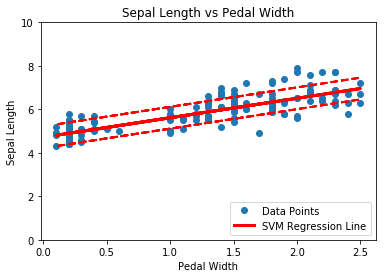

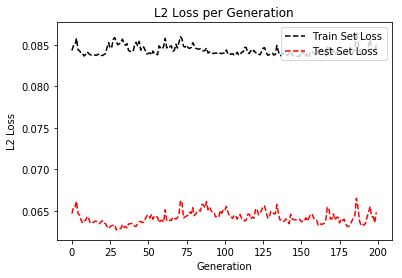

In [26]:
#plotting time
plt.plot(x_vals, y_vals,'o',label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line',linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)
plt.ylim([0,10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(train_loss,'k--',label='Train Set Loss')
plt.plot(test_loss,'r--',label='Test Set Loss')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.legend(loc='upper right')
plt.show()